In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [343]:
#carregando os dados

dadosTreino=pd.read_csv("./train.csv")

dadosTreino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [344]:
dadosTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [345]:
'''dados que podem ter relação com a sobrevivencia - Survived, Pclass (classe 1  
teve mais chance de sobrevivencia que classe 3?), Sexo, Age, numero de irmãos
e parch - pais e filhos a bordo. Fare ticket pode ter relação com a classe'''

'dados que podem ter relação com a sobrevivencia - Survived, Pclass (classe 1  \nteve mais chance de sobrevivencia que classe 3?), Sexo, Age, numero de irmãos\ne parch - pais e filhos a bordo. Fare ticket pode ter relação com a classe'

In [346]:
#quantos sobreviveram?
print(dadosTreino.Survived.value_counts())


0    549
1    342
Name: Survived, dtype: int64


In [347]:
#Estatistica sobre a idade das pessoas
dadosTreino["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [348]:
#Estatistica sobre sexo
dadosTreino["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [349]:
filtro = dadosTreino["Sex"] == 'male'
dadosTreino[["Survived", "Sex"]][filtro].head(10)

,Survived,Sex
0,0,male
4,0,male
5,0,male
6,0,male
7,0,male
12,0,male
13,0,male
16,0,male
17,1,male
20,0,male


In [350]:
#quantos homens sobreviveram??
men = dadosTreino[["Survived", "Sex"]][filtro]
#81% dos homens não sobreviveram 

menSurvived = men[men["Survived"] == 1]

print(" {}% dos homens sobreviveram ao titanic".format(round(len(menSurvived)/len(men) * 100), 2))
print(" {}% dos homens NÃO sobreviveram ao titanic".format(round(100 - (len(menSurvived)/len(men) * 100)), 2))

 19% dos homens sobreviveram ao titanic
 81% dos homens NÃO sobreviveram ao titanic


In [351]:
# quantas mulheres sobreviveram??
filtro2 = dadosTreino["Sex"] == 'female'

women = dadosTreino[["Survived", "Sex"]][filtro2]
womenSurvived = women[women.Survived == 1]

print(" {}% das mulheres sobreviveram ao titanic".format(round(len(womenSurvived)/len(women) * 100), 2))
print(" {}% das mulheres NÃO sobreviveram ao titanic".format(round(100 - (len(womenSurvived)/len(women) * 100)), 2))

 74% das mulheres sobreviveram ao titanic
 26% das mulheres NÃO sobreviveram ao titanic


[Text(0, 0, 'Sim'), Text(1, 0, 'Não')]

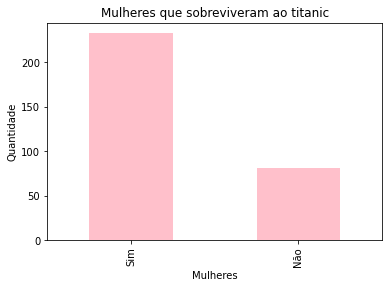

In [352]:
g2 = dadosTreino[["Survived", "Sex"]][filtro2].value_counts().plot(kind="bar", color="pink")
plt.title("Mulheres que sobreviveram ao titanic")
plt.xlabel("Mulheres")
plt.ylabel("Quantidade")

#Mudando os labels do gráfico
labels = [item.get_text() for item in g2.get_xticklabels()]
labels[0] = "Sim"
labels[1] = "Não"
g2.set_xticklabels(labels)

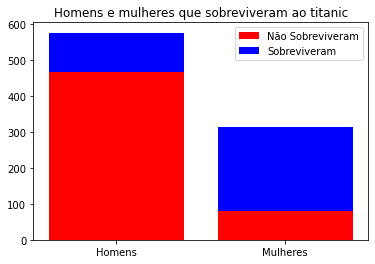

In [353]:
g1 = dadosTreino["Survived"][filtro].value_counts()
g2 = dadosTreino["Survived"][filtro2].value_counts()

homensNaoSobreviveram = g1[0]
homensSobreviveram = g1[1]
mulheresSobreviveram = g2[1]
mulheresNaoSobreviveram = g2[0]

index = ["Homens", "Mulheres"]

plt.bar(index, [homensNaoSobreviveram, mulheresNaoSobreviveram], color='red', label="Não Sobreviveram")
plt.bar(index, [homensSobreviveram, mulheresSobreviveram], bottom=[homensNaoSobreviveram, mulheresNaoSobreviveram],  color='blue', label="Sobreviveram")
plt.title("Homens e mulheres que sobreviveram ao titanic")
plt.legend(loc="upper right") #deve colocar o label na bar e, ai sim, chamar a função de legenda


Text(0.5, 1.0, 'Distribuição das pessoas por idade')

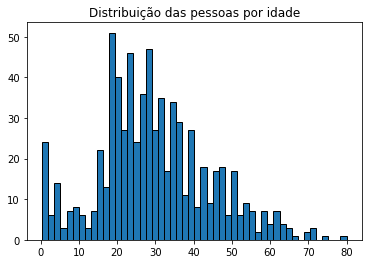

In [354]:
dadosTreino["Age"].hist(bins=50, grid=False, ec='black') #ec adiciona as linhas
plt.title("Distribuição das pessoas por idade")


In [355]:
dadosTreino["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

[80, 136]
[97, 87]
[372, 119]


Text(0, 0.5, 'Quantidade de pessoas')

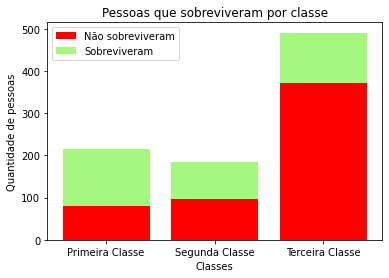

In [356]:
df= dadosTreino[["Survived", "Pclass"]]
primeiraClasse = [0, 0] #primeiro numero sao aqueles que nao sobreviveram e o segundo numero aqueles que sobreviveram
segundaClasse = [0,0] 
terceiraClasse = [0,0]

for i in range (0, len(df.index)): #len(df.index) é o jeito pra iterar cada linha do dataFrame
    if df.at[i, "Pclass"] == 1:
        if df.at[i,"Survived"] == 0:
            primeiraClasse[0] += 1;
        else:
            primeiraClasse[1] += 1;
    elif df.at[i, "Pclass"] == 2:
        if df.at[i,"Survived"] == 0:
            segundaClasse[0] += 1;
        else:
            segundaClasse[1] += 1;
    else:
        if df.at[i,"Survived"] == 0:
            terceiraClasse[0] += 1;
        else:
            terceiraClasse[1] += 1;
    
        
print(primeiraClasse)
print(segundaClasse)
print(terceiraClasse)

labels=["Primeira Classe", "Segunda Classe", "Terceira Classe"]

plt.bar(labels, [primeiraClasse[0], segundaClasse[0], terceiraClasse[0]], color='red', label="Não sobreviveram")
plt.bar(labels, [primeiraClasse[1], segundaClasse[1], terceiraClasse[1]], bottom=[primeiraClasse[0], segundaClasse[0], terceiraClasse[0]], color='#A6F780', label="Sobreviveram")
plt.legend(loc="upper left")
plt.title("Pessoas que sobreviveram por classe")
plt.xlabel("Classes")
plt.ylabel("Quantidade de pessoas")



In [357]:
df2 = pd.DataFrame({'nao sobreviveram':  [primeiraClasse[0], segundaClasse[0], terceiraClasse[0]], 
                    'sobreviveram': [primeiraClasse[1], segundaClasse[1], terceiraClasse[1]]}, index=labels)


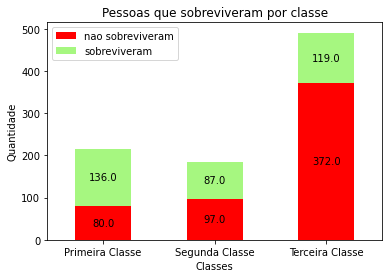

In [358]:
ax = df2.plot.bar(rot=0, stacked=True, color=['red', '#A6F780'], xlabel="Classes", ylabel="Quantidade")
plt.title("Pessoas que sobreviveram por classe")

#Código para colocar o texto no meio da tela
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

In [359]:
print(dadosTreino.groupby(["Pclass", "Sex"]).Survived.mean())

#se for mulher da primeira classe teria 96% de chances de sobrevivência ao passo que homens na terceira classe teve 13%

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


In [360]:
df4 = dadosTreino[["Age", "Survived"]][(dadosTreino.Sex=='male') & (dadosTreino.Survived==1)]
df4.index
for i in df4.index: #estou imprimindo todos os index do DataFrame
    print(i)

17
21
23
36
55
65
74
78
81
97
107
125
127
146
165
183
187
193
204
207
209
220
224
226
248
261
267
271
283
286
288
298
301
305
338
340
348
370
390
391
400
407
414
429
430
444
445
447
449
453
455
460
484
489
507
509
510
512
543
547
549
550
553
569
570
572
579
587
599
604
607
621
622
630
632
643
645
647
660
664
673
679
681
690
692
701
707
709
712
724
737
740
744
751
755
762
788
802
803
804
821
827
828
831
838
839
857
869
889


In [361]:
df4 = dadosTreino[["Age", "Survived"]][(dadosTreino.Sex=='male') & (dadosTreino.Survived==1)]

bin = ['Homens', 0,0,0,0,0,0,0] #vou categorizar aqui os resultados de quantos homens sobreviveram por faixa de idade.
'''
bin[1] - menor de 10 anos
bin[2] - 11 a 20 anos
bin[3] - 21 a 30 anos
bin[4] - 31 a 40 anos
bin[5] - 41 a 50 anos
bin[6] - 51 a 60 anos
bin[7] - acima de 60 anos

'''

for i in df4.index: #len(df.index) é uma lista com todos os indexes
    if df4.at[i,"Age"] <= 10:
        bin[1] += 1
    elif 10 < df4.at[i,"Age"] <= 20:
        bin[2] += 1
    elif 20 < df4.at[i,"Age"] <= 30:
        bin[3] += 1
    elif 30 < df4.at[i,"Age"] <= 40:
        bin[4] += 1
    elif 40 < df4.at[i,"Age"] <= 50:
        bin[5] += 1
    elif 50 < df4.at[i,"Age"] <= 60:
        bin[6] += 1
    else:
        bin[7] += 1

print(bin)

df4_2 = dadosTreino[["Age", "Survived"]][(dadosTreino.Sex=='female') & (dadosTreino.Survived==1)]

bin_F = ['Mulheres',0,0,0,0,0,0,0] #vou categorizar aqui os resultados de quantos homens sobreviveram por faixa de idade.
'''
bin[1] - menor de 10 anos
bin[2] - 11 a 20 anos
bin[3] - 21 a 30 anos
bin[4] - 31 a 40 anos
bin[5] - 41 a 50 anos
bin[6] - 51 a 60 anos
bin[7] - acima de 60 anos

'''

for i in df4_2.index: #len(df.index) é uma lista com todos os indexes
    if df4_2.at[i,"Age"] <= 10:
        bin_F[1] += 1
    elif 10 < df4_2.at[i,"Age"] <= 20:
        bin_F[2] += 1
    elif 20 < df4_2.at[i,"Age"] <= 30:
        bin_F[3] += 1
    elif 30 < df4_2.at[i,"Age"] <= 40:
        bin_F[4] += 1
    elif 40 < df4_2.at[i,"Age"] <= 50:
        bin_F[5] += 1
    elif 50 < df4_2.at[i,"Age"] <= 60:
        bin_F[6] += 1
    else:
        bin_F[7] += 1

print(bin_F)
    
labelsHist = ["sexo", "menor de 10 anos", "11 a 20 anos", "21 a 30 anos", "31 a 40 anos", "41 a 50 anos", "51 a 60 anos", "acima de 60 anos"]




['Homens', 19, 10, 23, 23, 12, 4, 18]
['Mulheres', 19, 34, 61, 46, 21, 13, 39]


In [362]:
df5 = pd.DataFrame(data=[bin, bin_F], columns=labelsHist) #0 = sobreviventes homens, 1- sobreviventes mulheres
df5

,sexo,menor de 10 anos,11 a 20 anos,21 a 30 anos,31 a 40 anos,41 a 50 anos,51 a 60 anos,acima de 60 anos
0,Homens,19,10,23,23,12,4,18
1,Mulheres,19,34,61,46,21,13,39


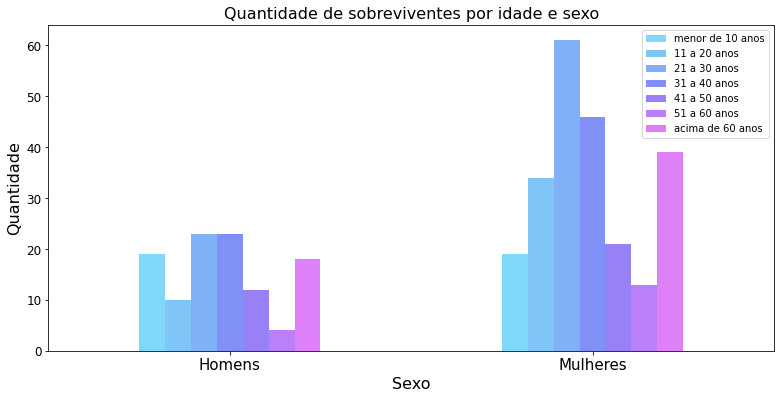

In [363]:
paletaCores = ["#80D7F7", "#80C5F7", "#80B1F7", "#8090F7", "#9880F7", "#BB80F7", "#DE80F7" ]

ax = df5.plot(kind="bar", title="Quantidade de sobreviventes por idade e sexo", figsize=(13,6), color=paletaCores)
ax.set_xlabel("Sexo", fontsize=16)
ax.set_ylabel("Quantidade", fontsize=16)

#mudando labels
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Homens"
labels[1] = "Mulheres"
ax.set_xticklabels(labels)

#mudando os parâmetros do meu gráfico (ticks sao os traços em cima do axis do gráfico. Em x é 'Homens' e 'Mulheres' e y é '0...60')
ax.tick_params(axis='x', labelsize=15, labelrotation=0)
ax.tick_params(axis='y', labelsize=12)

#alterando o tamanho do texto do titulo
ax.title.set_fontsize(16)



In [364]:
dadosTreino.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [365]:
#vou ter que transformar categoria sexo em numero (0 - male, 1- female)
dadosTreino.Sex = dadosTreino.Sex.map({"male": 0, "female": 1})
dadosTreino.info()
dadosTreino.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [366]:
dadosTreino[dadosTreino['Age'].isna()].head()
#mostrando as tuplas que as idades não estao preenchidas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q


In [367]:
#vou substituí-las por medianas
mediana = dadosTreino['Age'].dropna().median()
dadosTreino['Age'] = dadosTreino['Age'].fillna(mediana)

#esta linha está mostrando que eu substitui pela mediana
dadosTreino.iloc[[5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,Q


In [368]:
#montar uma arvore de decisão baseado em Sexo, Idade e Classe (Pclass)
from sklearn import tree 
from sklearn.metrics import mean_absolute_error

features = ['Sex', 'Age', 'Pclass']
y = dadosTreino['Survived']
X = dadosTreino[features] 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y) #capturar padrões e treinar os dados é um processo chamado fitting. 
y_predict = clf.predict(X)
print(mean_absolute_error(y, y_predict))

0.122334455667789


In [369]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.76536313 0.79775281 0.80898876 0.81460674 0.82022472]
0.8013872324398971


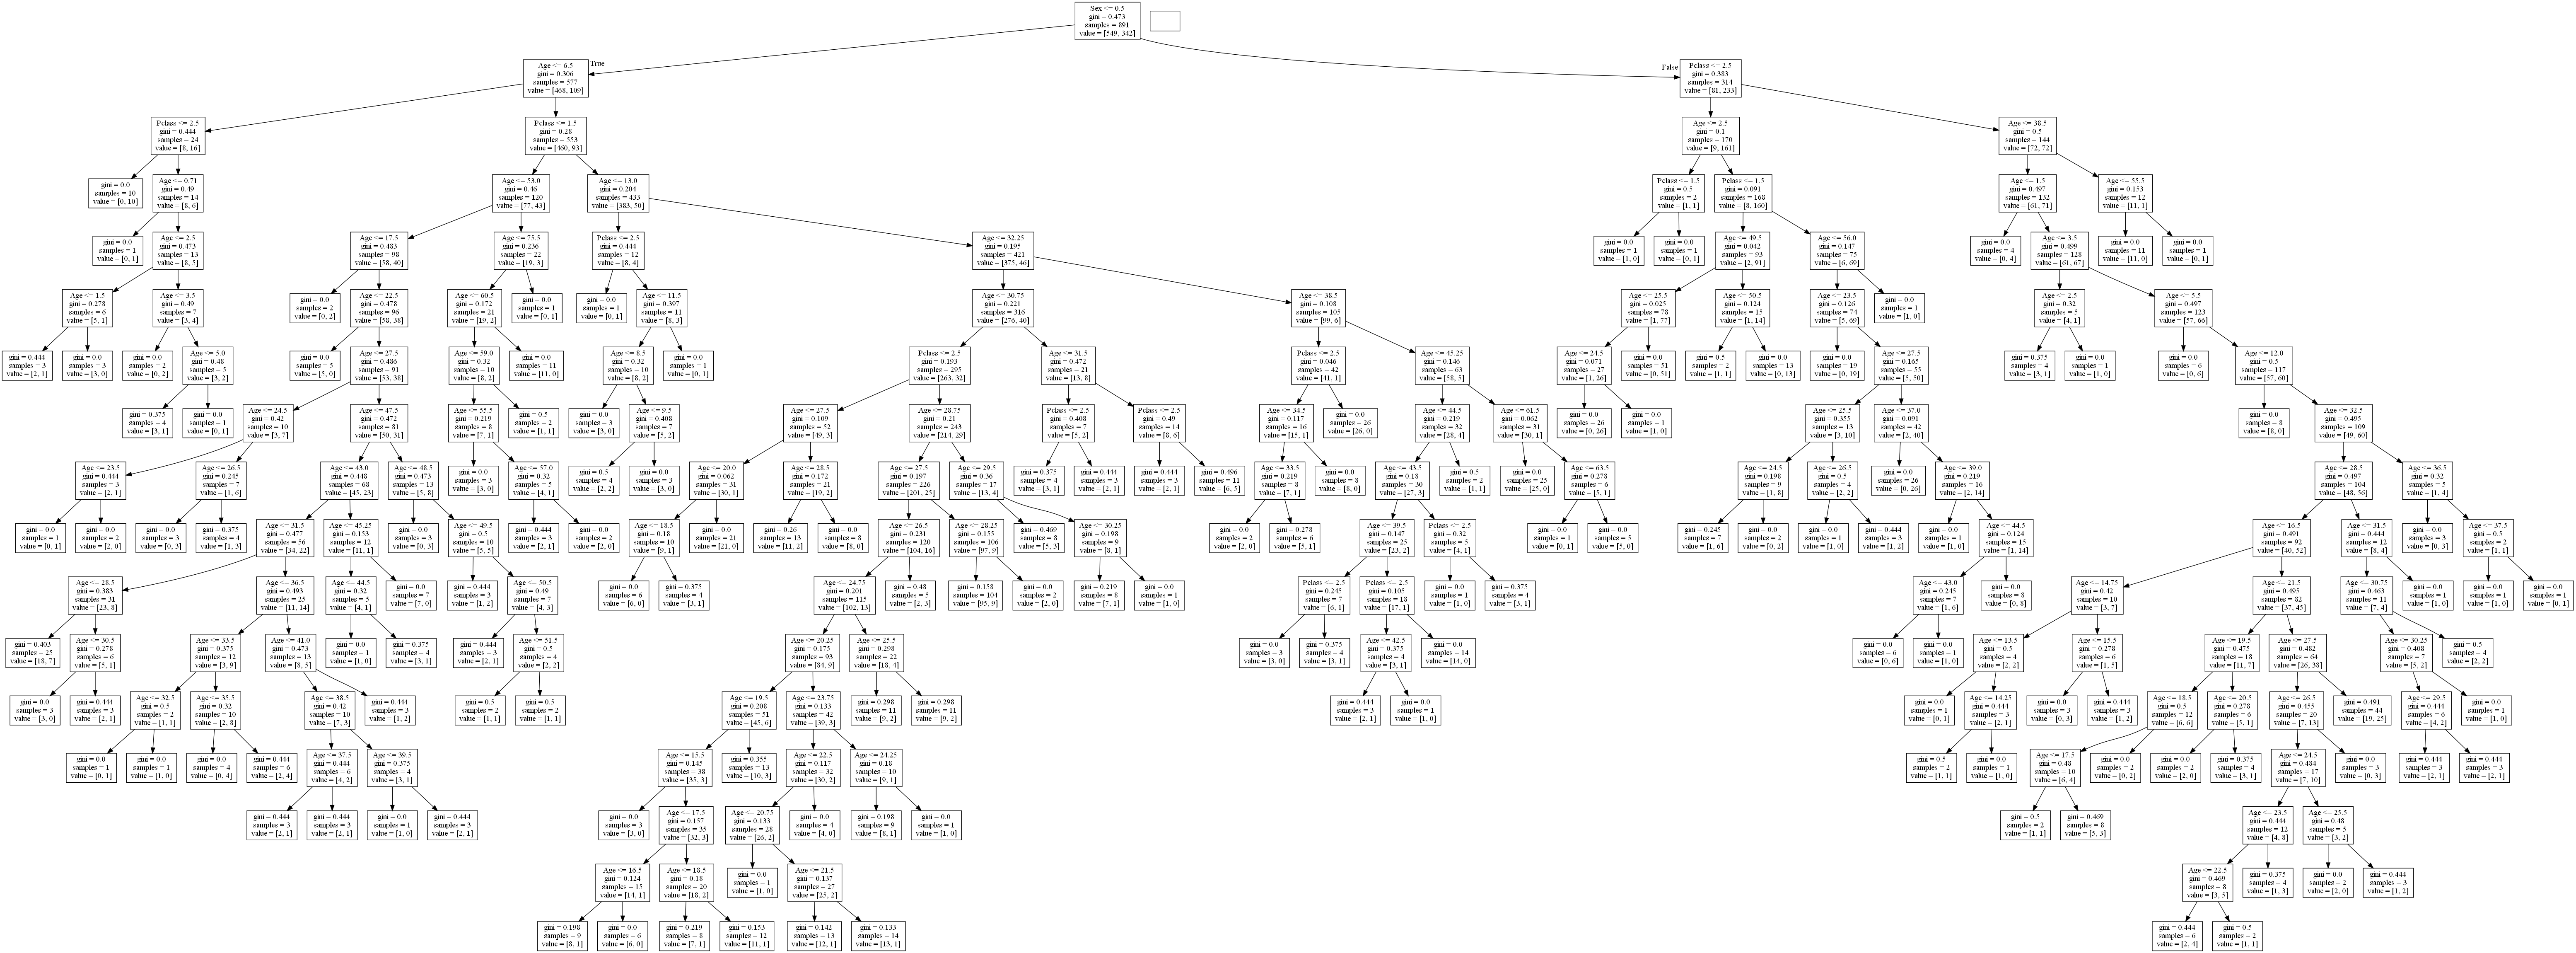

In [370]:
#exibindo a árvore
from IPython.display import Image  
from six import StringIO
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [371]:
#verificando dados de teste:
df_teste=pd.read_csv("./test.csv")
df_teste.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [372]:
df_teste.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [373]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [374]:
df_teste = df_teste[['Pclass', 'Sex', 'Age']]
df_teste.head()


,Pclass,Sex,Age
0,3,male,34.5
1,3,female,47.0
2,2,male,62.0
3,3,male,27.0
4,3,female,22.0


In [375]:
#tratar os valores nulos das idades
df_teste[df_teste['Age'].isna()].head()

,Pclass,Sex,Age
10,3,male,NaN
22,1,female,NaN
29,3,male,NaN
33,3,female,NaN
36,3,female,NaN


In [376]:
mediana = df_teste['Age'].dropna().median()
df_teste['Age'] = df_teste['Age'].fillna(mediana)
df_teste.iloc[[10]]

,Pclass,Sex,Age
10,3,male,27.0


In [377]:
#mapeei os dados do Sexo da base de testes para número
d = {'male': 0, 'female': 1}
df_teste.Sex = df_teste.Sex.map(d)
df_teste.head()

,Pclass,Sex,Age
0,3,0,34.5
1,3,1,47.0
2,2,0,62.0
3,3,0,27.0
4,3,1,22.0


In [378]:
#prever os valores através da árvore montada acima (0 - don`t survive , 1 - survive)
clf.predict(df_teste.head())

array([1, 1, 1, 1, 1], dtype=int64)

In [379]:
#agora com os valores completos
survivedPrediction = clf.predict(df_teste)
survivedPrediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [380]:
df_teste['Survived'] = survivedPrediction

In [381]:
df_teste.head()

,Pclass,Sex,Age,Survived
0,3,0,34.5,1
1,3,1,47.0,1
2,2,0,62.0,1
3,3,0,27.0,1
4,3,1,22.0,1


In [382]:
df_teste.Survived = df_teste.Survived.map({0: 'No', 1: 'Yes'})
df_teste['Survived'].value_counts(normalize=True)

Yes    0.980861
No     0.019139
Name: Survived, dtype: float64

Nos dados de teste com 3 variáveis, deu 98% de sobrevivencia da amostra de teste contra 2% que faleceram

In [383]:
df_teste.head()

,Pclass,Sex,Age,Survived
0,3,0,34.5,Yes
1,3,1,47.0,Yes
2,2,0,62.0,Yes
3,3,0,27.0,Yes
4,3,1,22.0,Yes


In [384]:
#testando com o modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y) #dados de Treino
val_preds = forest_model.predict(X)
print(mean_absolute_error(y, val_preds))

0.18478593546849353


In [385]:
df_teste = df_teste[['Pclass', 'Sex', 'Age']]


In [386]:
survived_forest_test = forest_model.predict(df_teste)
np.round(survived_forest_test, 1)

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       0.4, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.

In [387]:
df_teste['Survived_2'] = np.round(survived_forest_test, 1)

In [388]:
df_teste.Survived_2.value_counts()

1.0    408
0.4      8
0.7      2
Name: Survived_2, dtype: int64

Testando modelo Linear SVC

In [389]:
#Training set - vou dividir o training set para poder fazer um supervised learning
from sklearn.model_selection import train_test_split

features = ['Sex', 'Age', 'Pclass']
y = dadosTreino['Survived']
X = dadosTreino[features] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [390]:
from sklearn import svm
#aplicando o modelo linear SVC
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [391]:
y_predict = clf.predict(X_test)
mean_absolute_error(y_test, y_predict) #deu uma MAE maior do que decision tree

0.2122905027932961

In [392]:
df_teste = df_teste[['Pclass', 'Sex', 'Age']]
df_teste_survived2 = clf.predict(df_teste)

In [393]:
df_teste['Survived_SVC'] = df_teste_survived2

In [394]:
df_teste['Survived_SVC'] = df_teste['Survived_SVC'].map({0: 'No', 1: 'Yes'})
df_teste['Survived_SVC'].value_counts(normalize=True)

Yes    1.0
Name: Survived_SVC, dtype: float64

No kernel 'linear' está dando 100% todos que sobreviveram com MAE de 0.21<br>
No kernel 'rbf' está dando 9.5% das pessoas que sobreviveram com MAE de 0.36

In [395]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.74825175 0.81818182 0.76760563 0.78169014 0.81690141]
0.7865261499064315


No modelo SVC deu 78% de precisão. Vamos ver se aumentando os atributos features ajuda em alguma coisa

In [396]:
#correlação entre numero de irmãos e maridos a bordo (SibSp) e sobrevivente
#quantidade de irmãos e maridos a bordo
dadosTreino.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [397]:
type(dadosTreino.SibSp)

pandas.core.series.Series

In [398]:
dadosTreino.SibSp.corr(dadosTreino.Survived) #nao há muita correlação

-0.035322498885735666

In [399]:
#entao vamos ver com quantidade de pais/filhos (Parch) e sobreviventes
dadosTreino.Parch.corr(dadosTreino.Survived) #eles sozinho nao tão representando muito. 

0.08162940708348382

In [400]:
#vamos ver o local de embarque, se houve alguma significativa melhora (Embarked)
#mas antes preciso mapear o embarked
dadosTreino.Embarked = dadosTreino.Embarked.map({"C": 0, "Q": 1, "S": 2})


In [401]:
dadosTreino.info()
dadosTreino.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [402]:
#Temos dois valores nulos. Então, vamos definir o valor -1 para não informado.
dadosTreino[dadosTreino['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [403]:
dadosTreino['Embarked'] = dadosTreino.Embarked.fillna(-1)

In [404]:
dadosTreino[dadosTreino['Embarked'] == -1] #substituído.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,-1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,-1.0


In [405]:
dadosTreino.info() #o tipo embarked tá como float... vamos converter pra int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [406]:
dadosTreino['Embarked'] = dadosTreino.Embarked.astype('int64')

In [407]:
dadosTreino.info()
dadosTreino.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [408]:
#agora posso ver se há alguma relação
dadosTreino.Embarked.corr(dadosTreino.Survived)

-0.17650922516888204

In [409]:
#vamos montar uma árvore de decisão com estes 3 atributos novos
newFeatures = ['Sex', 'Age', 'Pclass', 'Embarked', 'SibSp', 'Parch']
y = dadosTreino['Survived']
X = dadosTreino[newFeatures] 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y) #capturar padrões e treinar os dados é um processo chamado fitting. 

In [410]:
y_predict = clf.predict(X)
print(mean_absolute_error(y, y_predict)) 

0.06397306397306397


MAE deu metade da primeira árvore de decisão montada lá em cima, aumentando a precisão do modelo de árvore de decisão

In [411]:
scores = cross_val_score(clf, X, y, cv=5)

# Print the accuracy for each fold:
print(scores)

# And the mean accuracy of all 5 folds:
print(scores.mean())

[0.72625698 0.79775281 0.80898876 0.79775281 0.83146067]
0.7924424078839998


In [412]:
#vamos tratar os dadosTeste
df_teste=pd.read_csv("./test.csv")
df_teste = df_teste[newFeatures]
df_teste.info()
df_teste.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       332 non-null    float64
 2   Pclass    418 non-null    int64  
 3   Embarked  418 non-null    object 
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


,Sex,Age,Pclass,Embarked,SibSp,Parch
0,male,34.5,3,Q,0,0
1,female,47.0,3,S,1,0
2,male,62.0,2,Q,0,0
3,male,27.0,3,S,0,0
4,female,22.0,3,S,1,1


In [413]:
#vamos tratar novamente os dados Sex, Embarked e retirar os valores nulos em Age
df_teste.Sex = df_teste.Sex.map({"male": 0, "female": 1})

#tratando embarked. No set de testes não há valores nulos
df_teste.Embarked = df_teste.Embarked.map({"C": 0, "Q": 1, "S": 2})

#tratando idade
mediana = df_teste['Age'].dropna().median()
df_teste['Age'] = df_teste['Age'].fillna(mediana)

df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    int64  
 1   Age       418 non-null    float64
 2   Pclass    418 non-null    int64  
 3   Embarked  418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB


In [414]:
df_teste.head()

,Sex,Age,Pclass,Embarked,SibSp,Parch
0,0,34.5,3,1,0,0
1,1,47.0,3,2,1,0
2,0,62.0,2,1,0,0
3,0,27.0,3,2,0,0
4,1,22.0,3,2,1,1


In [415]:
#aplicando o modelo de árvore de decisão nestes dados.
df_teste['Survived'] = clf.predict(df_teste)

In [416]:
df_teste.Survived.value_counts()

1    216
0    202
Name: Survived, dtype: int64

A diferença foi absurda. Neste segundo modelo, com mais atributos, deu 53% de pessoas que não sobreviveram e 47% das pessoas sobreviveram

In [417]:
df_teste[df_teste.Survived == 1].groupby('Sex').count().Survived
#das 195 pessoas que sobreviveram, 112 são mulheres e 83 são homens. 

Sex
0     94
1    122
Name: Survived, dtype: int64

In [418]:
df_teste[df_teste.Survived == 1].groupby(['Pclass', 'Sex']).count().Survived
# das 112 mulheres, 48 mulheres que sobreviveram neste teste foi de 1a classe (42%)

Pclass  Sex
1       0      29
        1      48
2       0       3
        1      29
3       0      62
        1      45
Name: Survived, dtype: int64

In [419]:
#testando com o modelo de Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y) #dados de Treino
val_preds = forest_model.predict(X)
print(mean_absolute_error(y, val_preds)) #o Random Forest também teve melhora com relação ao teste anterior com 3 features
                                         #mas ainda é menos preciso que a árvore de decisão normal

0.13466717158956715


In [420]:
df_teste = df_teste[newFeatures]
df_teste['Survived_RF'] = forest_model.predict(df_teste)

In [421]:
df_teste.head(10)

,Sex,Age,Pclass,Embarked,SibSp,Parch,Survived_RF
0,0,34.5,3,1,0,0,0.000000
1,1,47.0,3,2,1,0,0.030000
2,0,62.0,2,1,0,0,0.680000
3,0,27.0,3,2,0,0,0.734333
4,1,22.0,3,2,1,1,0.374075
5,0,14.0,3,2,0,0,0.203240
6,1,30.0,3,1,0,0,0.390893
7,0,26.0,2,2,1,1,0.010000
8,1,18.0,3,0,0,0,0.100000
9,0,21.0,3,2,2,0,0.144757


In [422]:
df_teste.Survived_RF.round(1).value_counts() #esse modelo da gravações entre 0 a 1 em sobrevivencia. Como definir de fato quem sobreviveu

0.0    82
1.0    79
0.7    43
0.2    36
0.1    34
0.5    31
0.4    29
0.9    25
0.6    22
0.3    21
0.8    16
Name: Survived_RF, dtype: int64

In [423]:
df_teste.Survived_RF[df_teste.Survived_RF >= 0.5].count() #202 pessoas teriam mais de 50% de sobrevivência (??)

191

In [424]:
df_teste.Survived_RF[df_teste.Survived_RF < 0.5].count() #216 pessoas tem menos de 50% de sobrevivencia 

227

In [425]:
df_teste[df_teste.Survived_RF == 1].head() #alguns individuos que certamente sobreviveram

,Sex,Age,Pclass,Embarked,SibSp,Parch,Survived_RF
12,1,23.0,1,2,1,0,1.0
26,1,22.0,1,0,0,1,1.0
43,1,30.0,2,2,0,0,1.0
52,1,20.0,2,2,2,1,1.0
59,1,36.0,1,0,0,0,1.0


In [426]:
df_teste[df_teste.Survived_RF == 0].head() #alguns individuos que certamente morreram

,Sex,Age,Pclass,Embarked,SibSp,Parch,Survived_RF
0,0,34.5,3,1,0,0,0.0
25,0,50.0,3,2,1,0,0.0
30,0,50.0,2,2,1,0,0.0
31,0,24.0,2,2,2,0,0.0
42,0,41.0,3,2,0,0,0.0


In [427]:
#Testando com modelo Linear SVC
y = dadosTreino['Survived']
X = dadosTreino[newFeatures] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [428]:
y_predict = clf.predict(X_test)
mean_absolute_error(y_test, y_predict) #deu uma MAE igual a com features antigos

0.2122905027932961

In [430]:
df_teste = df_teste[newFeatures]
df_teste['Survived_SVC'] = clf.predict(df_teste)

In [444]:
df_teste.Survived_SVC.value_counts(normalize=True)

0    266
1    152
Name: Survived_SVC, dtype: int64

No modelo linear SVC, com mais atributos, deu 63% de pessoas que não sobreviveram e 37% das pessoas não sobreviveram

In [443]:
df_teste[df_teste.Survived_SVC == 1].groupby('Sex').count().Survived_SVC

Sex
1    152
Name: Survived_SVC, dtype: int64

Neste modelo, todas as mulheres sobreviveram